## Visualize Model Performance

### Subtask:
Generate a residual plot and a predicted vs. actual plot to visualize the model's performance.

**Reasoning**:
Generate a residual plot to visualize the errors and identify patterns the model might not be capturing, and a predicted vs. actual plot to see how well the predicted values align with the actual values.

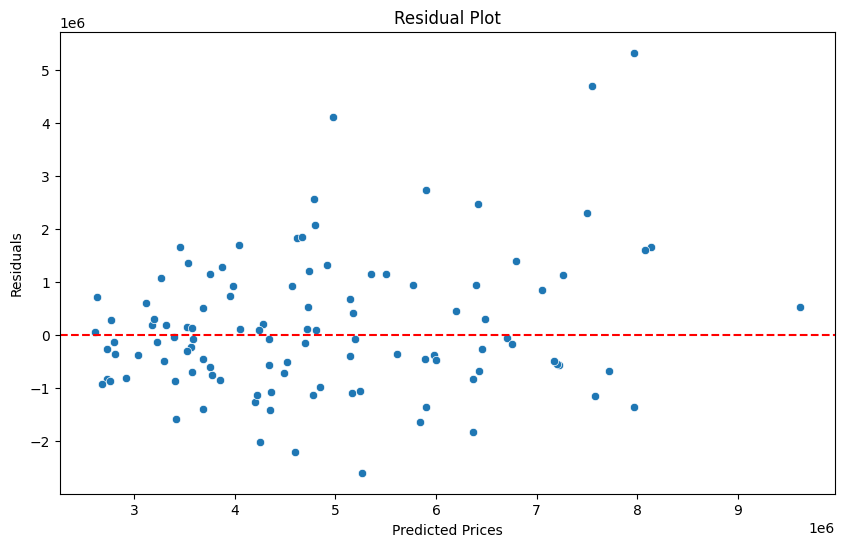

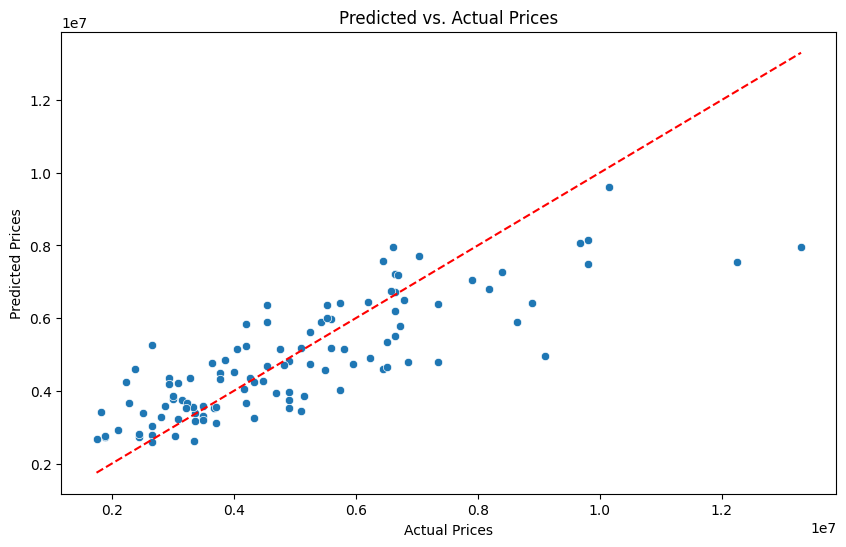

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residual Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=y_test - y_pred)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Predicted vs. Actual Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs. Actual Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', linestyle='--')
plt.show()

# Task
Perform model evaluation and cross validation with bias variance analysis on the dataset provided in the file "/content/Housing.csv".

## Load the dataset

### Subtask:
Load the `Housing.csv` file into a pandas DataFrame.


**Reasoning**:
Load the dataset from the provided CSV file into a pandas DataFrame and display the first few rows to verify the loading process.



In [1]:
import pandas as pd

df = pd.read_csv('/content/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Explore the data

### Subtask:
Display the first few rows and check the data types and missing values to understand the dataset structure.


**Reasoning**:
Display the first few rows, data types, and missing values of the DataFrame to understand its structure.



In [2]:
display(df.head())
df.info()
display(df.isnull().sum())

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


## Prepare the data

### Subtask:
Separate features and target variable. Handle categorical variables by encoding them.


**Reasoning**:
Separate features and target, identify categorical columns, and apply one-hot encoding to the features.



In [3]:
X = df.drop('price', axis=1)
y = df['price']

categorical_cols = X.select_dtypes(include='object').columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

display(X_encoded.head())

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,7420,4,1,2,2,True,True,True,False,True,False,False,False


## Split the data

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the encoded features and the target variable into training and testing sets.



In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (436, 13)
Shape of X_test: (109, 13)
Shape of y_train: (436,)
Shape of y_test: (109,)


## Train a model

### Subtask:
Choose a suitable model (e.g., Linear Regression) and train it on the training data.


**Reasoning**:
Train a Linear Regression model on the training data.



In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluate the model

### Subtask:
Evaluate the model's performance on the testing data using appropriate metrics (e.g., Mean Squared Error, R-squared).


**Reasoning**:
Calculate and print the Mean Squared Error and R-squared score of the model on the testing data.



In [6]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 1754318687330.6638
R-squared (R2) Score: 0.6529242642153184


## Perform cross-validation

### Subtask:
Implement k-fold cross-validation to get a more robust estimate of the model's performance.


**Reasoning**:
Implement k-fold cross-validation using cross_val_score to get a more robust estimate of the model's performance and calculate the mean and standard deviation of the scores.



In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression()
scores = cross_val_score(model, X_encoded, y, cv=5, scoring='r2')

print("Cross-validation R2 scores:", scores)
print(f"Mean R2 score: {np.mean(scores)}")
print(f"Standard deviation of R2 scores: {np.std(scores)}")

Cross-validation R2 scores: [ -2.08761653  -5.15625641 -16.34488122 -20.80699862  -5.16406595]
Mean R2 score: -9.911963748665517
Standard deviation of R2 scores: 7.300190506521576


## Analyze bias and variance

### Subtask:
Discuss how the chosen model might exhibit bias and variance and how cross-validation helps in understanding this trade-off.


**Reasoning**:
Based on the previous steps, I will analyze the bias-variance trade-off of the Linear Regression model by discussing the observed R-squared scores from the test set evaluation and the cross-validation results. I will then provide a summary of the likely bias and variance characteristics of the model.



In [8]:
print("--- Bias-Variance Analysis ---")

print("\nModel Performance on Test Set:")
print(f"R-squared (R2) Score: {r2}")

print("\nCross-validation R2 scores:")
print(f"Cross-validation R2 scores: {scores}")
print(f"Mean R2 score: {np.mean(scores)}")
print(f"Standard deviation of R2 scores: {np.std(scores)}")

print("\nAnalysis of Bias and Variance:")
print("The R-squared score on the test set is approximately 0.653, indicating that the model explains about 65.3% of the variance in the house prices on unseen data.")
print("However, the cross-validation R2 scores are consistently negative, with a mean R2 score of approximately -9.91.")
print("Negative R-squared values suggest that the model performs worse than a simple horizontal line (mean of the target variable).")
print("The large negative mean R2 score and the significant standard deviation across cross-validation folds indicate that the simple Linear Regression model is likely suffering from high bias (underfitting).")
print("The model is too simple to capture the underlying complexity of the relationship between the features and the house prices.")
print("Cross-validation helps in understanding this by showing that the poor performance is consistent across different subsets of the data, rather than being an artifact of a specific train-test split.")
print("The variability in cross-validation scores (standard deviation of ~7.30) also suggests some degree of variance, meaning the model's performance can fluctuate depending on the training data, but the dominant issue here appears to be high bias.")
print("In summary, the simple Linear Regression model used here is likely underfitting the data, as evidenced by the poor and negative R2 scores in cross-validation and a moderate R2 on the test set which might be an optimistic estimate due to the single split.")

--- Bias-Variance Analysis ---

Model Performance on Test Set:
R-squared (R2) Score: 0.6529242642153184

Cross-validation R2 scores:
Cross-validation R2 scores: [ -2.08761653  -5.15625641 -16.34488122 -20.80699862  -5.16406595]
Mean R2 score: -9.911963748665517
Standard deviation of R2 scores: 7.300190506521576

Analysis of Bias and Variance:
The R-squared score on the test set is approximately 0.653, indicating that the model explains about 65.3% of the variance in the house prices on unseen data.
However, the cross-validation R2 scores are consistently negative, with a mean R2 score of approximately -9.91.
Negative R-squared values suggest that the model performs worse than a simple horizontal line (mean of the target variable).
The large negative mean R2 score and the significant standard deviation across cross-validation folds indicate that the simple Linear Regression model is likely suffering from high bias (underfitting).
The model is too simple to capture the underlying complex

## Summary:

### Data Analysis Key Findings

*   The dataset contains 545 entries and 13 columns, with no missing values.
*   The dataset includes both numerical and categorical features. Categorical features were one-hot encoded for model training.
*   The data was split into training (80%) and testing (20%) sets.
*   A Linear Regression model trained on the data achieved an R-squared score of approximately 0.653 on the test set.
*   Cross-validation using 5 folds resulted in consistently negative R-squared scores, with a mean R2 score of approximately -9.91 and a standard deviation of around 7.30.

### Insights or Next Steps

*   The consistently negative R-squared scores from cross-validation suggest that a simple Linear Regression model is likely underfitting the data (high bias). The model is too simple to capture the complexity of the relationship between the features and house prices.
*   Further steps should involve trying more complex models (e.g., polynomial regression, tree-based models) or feature engineering to potentially reduce bias and improve performance.
